In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Using the inspector to print the column names within the 'measurement' table and its types


inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [125]:
recent_date = session.query(Measurement.date).\
                order_by(Measurement.date.desc()).first()[0]
recent_date

'2017-08-23'

In [137]:
dt_recent_date = func.date(recent_date)
dt_recent_date

# Calculate the date one year from the last date in data set.
recent_year = dt_recent_date - dt.timedelta(days=365)
recent_year

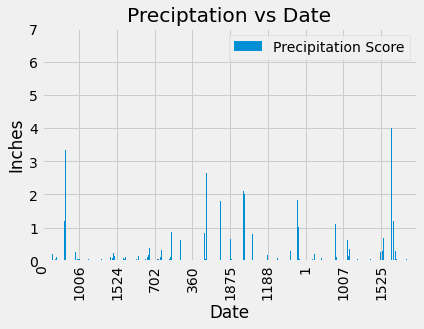

In [155]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

#HOW TO CONVERT STRING TO DATE TIME AND PLUG INTO RECENT YEAR?????
dt_recent_date = func.dt(recent_date)
dt_recent_date

# Calculate the date one year from the last date in data set.
recent_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
recent_year

# Perform a query to retrieve the data and precipitation scores

#Don’t pass the date as a variable to your query. ???

prep_scores = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date > recent_year).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
prep_df = pd.DataFrame(prep_scores, columns=['Measurement Date', 'Precipitation Score'])

prep_df

# Sort the dataframe by date
sorted_prep_df = prep_df.sort_values("Measurement Date")
sorted_prep_df

# Use Pandas Plotting with Matplotlib to plot the data
sorted_prep_df.plot.bar()
plt.title("Preciptation vs Date")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation="vertical")
plt.locator_params(axis='x', nbins=10)


# NEED to MESS with TICKS ?????

plt.show()





In [48]:
prep_stat = prep_df.describe()
prep_stat

,Precipitation Score
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [85]:
# Design a query to calculate the total number of stations in the dataset
stat_count = session.query(Measurement.station).\
                group_by(Measurement.station).count()
stat_count

9

In [94]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stat_count = func.count(Measurement.station)
sel = [Measurement.station, stat_count]
active_stat = session.query(*sel).\
                group_by(Measurement.station).\
                order_by(stat_count.desc()).all()
active_stat


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [97]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_temp = func.min(Measurement.tobs)
high_temp = func.max(Measurement.tobs)
avg_temp = func.avg(Measurement.tobs)
sel = [low_temp, high_temp, avg_temp]
most_active_stat = session.query(*sel).\
                group_by(Measurement.station).\
                order_by(stat_count.desc()).first()
most_active_stat


(54.0, 85.0, 71.66378066378067)

In [147]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stat_count = func.count(Measurement.station)
recent_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
stat = session.query(Measurement.station).\
                group_by(Measurement.station).\
                order_by(stat_count.desc()).first()[0]
active_temp = session.query(Measurement.tobs).\
                    filter(Measurement.date > recent_year).\
                    filter(Measurement.station == stat).all()

tobs_df = pd.DataFrame(active_temp, columns=['Temperature'])
tobs_df

,Temperature
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


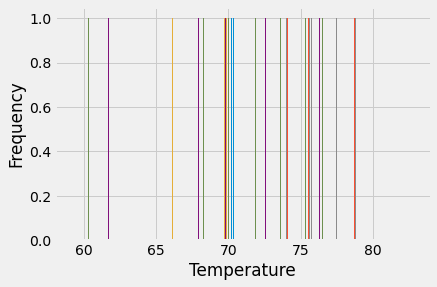

In [123]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(tobs_df, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 4.183333333333314, 'Temperature')

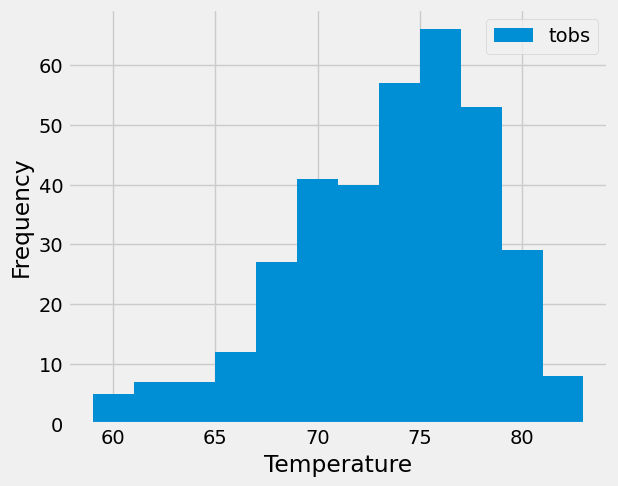

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()